# **TRAEA 5 - REGRESIÓN LOGÍSTICA - RAFAEL AUGUSTO MENDOZA NIEVES - UNAD**

## **1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.**

In [40]:
#Cargar las librerias necesrias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

In [7]:
# lectura de datos en Python y lo cargamos en la variable Datos
Datos = pd.read_csv('Titanic-Dataset.csv')

In [8]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
# Descripción de los datos
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## **2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.**

In [10]:
# Identificar valores faltantes
valores_faltantes = Datos.isnull().sum()
print(valores_faltantes)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [11]:
# Calcular el porcentaje de valores faltantes
porcentaje_faltantes = (Datos.isnull().sum() / Datos.shape[0]) * 100
print(porcentaje_faltantes)


PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [13]:
# Añadir valores faltantes con la media
Datos['Age'].fillna(Datos['Age'].mean(), inplace=True)

In [15]:
# Añadir valores faltantes con la moda
Datos['Embarked'].fillna(Datos['Embarked'].mode()[0], inplace=True)

In [18]:
# Añadir Más valores faltantes con la moda
Datos['Cabin'].fillna(Datos['Cabin'].mode()[0], inplace=True)

In [19]:
# Verificar nuevamente los valores faltantes después de la imputación
print(Datos.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

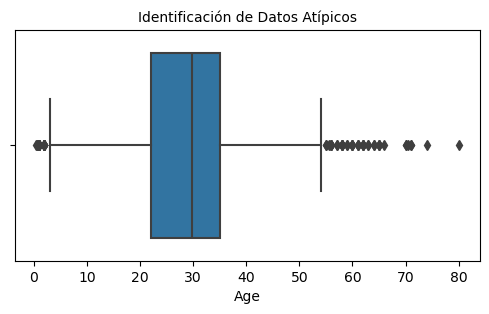

In [21]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [22]:
#Conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=120
Total_Atipicos=((Datos['Age']<nivel_minimo)|(Datos['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


## **3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.**

Para este caso se toma en cuenta la variable (Survived) ya que si equivale a 0 quiere decir que no sobrevivió pero si el valor es 1 quiere decir que si sobrevivióts()

In [23]:
# Total de personas que sobrevivieron

Datos['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [24]:
Datos[['Survived']].head(30)

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


## **4. Dividir el dataset en Train y Test para evaluar correctamente el modelo**

In [29]:
# Seleccionar las características (X) y el objetivo (y)
X = Datos.drop(columns=['Survived'])  # Características
y = Datos['Survived']  # Objetivo

In [30]:
# Identificar las columnas numéricas y categóricas
columnas_numericas = X.select_dtypes(include=['int64', 'float64']).columns
columnas_categoricas = X.select_dtypes(include=['object']).columns

In [41]:
# Crear un preprocesador para imputar y transformar los datos
preprocesador = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), columnas_numericas),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), columnas_categoricas)
    ])

In [52]:
# Dividir los datos en conjuntos de entrenamiento y prueba con estratificación
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [53]:
print (X_train)

     PassengerId  Pclass                                           Name  \
692          693       3                                   Lam, Mr. Ali   
481          482       2               Frost, Mr. Anthony Wood "Archie"   
527          528       1                             Farthing, Mr. John   
855          856       3                     Aks, Mrs. Sam (Leah Rosen)   
801          802       2    Collyer, Mrs. Harvey (Charlotte Annie Tate)   
..           ...     ...                                            ...   
359          360       3              Mockler, Miss. Helen Mary "Ellie"   
258          259       1                               Ward, Miss. Anna   
736          737       3        Ford, Mrs. Edward (Margaret Ann Watson)   
462          463       1                              Gee, Mr. Arthur H   
507          508       1  Bradley, Mr. George ("George Arthur Brayton")   

        Sex        Age  SibSp  Parch      Ticket      Fare    Cabin Embarked  
692    male  29.6991

In [54]:
print (Y_train)

692    1
481    0
527    0
855    1
801    1
      ..
359    1
258    1
736    0
462    0
507    1
Name: Survived, Length: 712, dtype: int64


## **5. Entrenar el modelo configurando los diferentes hiperparámetros**

In [55]:
# Crear y ajustar el pipeline con el modelo
modelo_regresion = Pipeline(steps=[
    ('preprocesador', preprocesador),
    ('clasificador', LogisticRegression(solver='liblinear'))
])

modelo_regresion.fit(X_train, y_train)

Pipeline(steps=[('preprocesador',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object'))])),
                ('clasificador', LogisticRegression(solver='liblinear'))])

In [56]:
print (Y_test)

565    0
160    0
553    1
860    0
241    1
      ..
880    1
91     0
883    0
473    1
637    0
Name: Survived, Length: 179, dtype: int64


In [57]:
# Predicción
Prediccion = modelo_regresion.predict(X_test)

In [58]:
print (Prediccion)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## **6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc**

In [64]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.63      0.95      0.75       110
           1       0.54      0.10      0.17        69

    accuracy                           0.62       179
   macro avg       0.58      0.52      0.46       179
weighted avg       0.59      0.62      0.53       179



## **7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo**

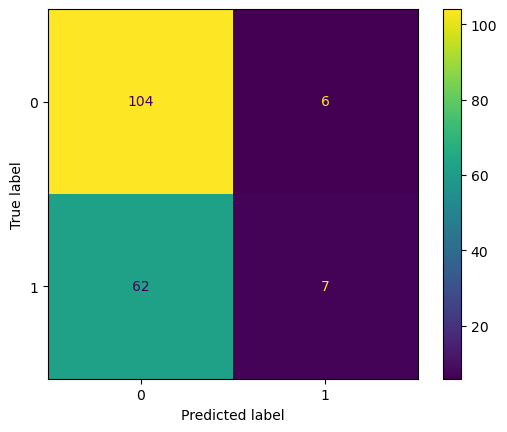

In [59]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

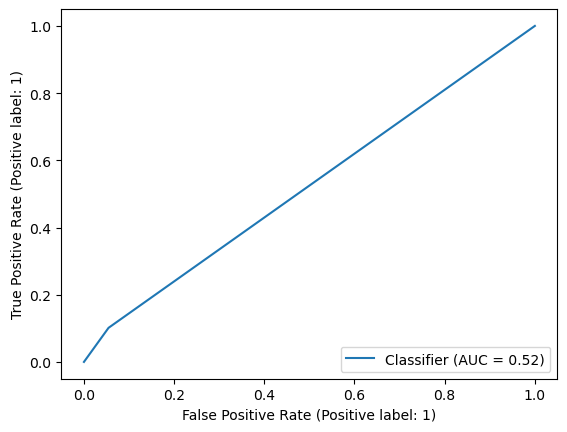

In [60]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

## **8. Interpretar, analizar y documentar los resultados obtenidos.**

Al dar por terminado el paso a paso de este ejercicio de regresión logística pudimos observar que el nivel de precisión del modelo teniendo en cuenta la variable (Survived) fue de 0,54 lo que en datos porcentuales muestra que el 54 % de los datos encontrados como tripulantes que sobrevivieron en efecto si sobrevivieron.

Ahora el valor encontrado referente al concepto recall y a la misma variable es de 0,10 de lo cual se infiere que el 10 % de los datos encontrados que sobrevivieron en realidad si sobrevivieron. Por otro lado, el valor del F1-score en base a la misma variable (Survived) es de 0,17 este valor muestra que hay un muy bajo equilibrio entre los valores de precisión y recall.

Ahora si se tienen en cuenta los resultados de la grafica de matriz de confusión se pudo evidenciar lo siguiente: El numero de tripulantes en la gráfica que en realidad sobrevivieron es de 7, mientras que 104 no sobrevivieron, en contraste con estos resultados tenemos a 62 tripulantes los cuales al parecer sobrevivieron, pero en realidad no y 6 tripulantes que no parecían que habrian sobrevivido, pero en realidad si.

Por último, de la grafica de la curva de precisión y basado en el valor visto de 0,55 se puede inferir que el 52% de las predicciones obtenidas son correctas.